# 서울시에서 일어나는 범죄와 체감 안전도
: 강남3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [17]:
import pandas as pd

In [18]:
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv", encoding="euc-kr")
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [19]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [20]:
crime_anal_police[crime_anal_police['관서명']=="강서서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [21]:
police_address = pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [22]:
# Method 1

station_name = []

for i in crime_anal_police['관서명']:
    station_name.append("서울"+i[:-1]+"경찰서")

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [23]:
# Method 2

station_name = []
station_name = list("서울" + crime_anal_police['관서명'].str[:-1] + "경찰서")
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [24]:
# 경찰서 갯수 확인
len(station_name)

31

In [25]:
len(police_address)

31

In [27]:
import urllib.request

client_id = "knyo4tcwfn"
client_secret = "GpwWAGlloYMUQhozeVUbtzSqKjxV5bgDmK1gYWMv"

# top 위도, 경도
lng = []
lat = []

# 기름 비싼 매장 10
for address in police_address['주소']:
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    import json
    data = json.loads(enText)

    lng.append(data['addresses'][0]['x'])
    lat.append(data['addresses'][0]['y'])

    

In [28]:
police_address['lng'] = lng
police_address['lat'] = lat

In [29]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764


In [30]:
# police_address.to_csv("../Data/SeoulPoliceAddress_lating.csv", index=False)

In [31]:
# 2개의 File에 경찰관서 동일한 이름인지 확인
len(station_name == police_address['경찰관서']) # 글자와 순서가 동일

31

In [32]:
# 경찰서의 주소중 구 이름만 추출하기
# [region.split()[1] for region in police_address['주소']]
police_gu = police_address['주소'].str.split()
police_gu

0            [서울, 중구, 수표로, 27]
1           [서울, 종로구, 율곡로, 46]
2          [서울, 중구, 한강대로, 410]
3         [서울, 서대문구, 통일로, 113]
4      [서울, 종로구, 창경궁로, 112-16]
5        [서울, 용산구, 원효로89길, 24]
6          [서울, 성북구, 보문로, 170]
7      [서울, 동대문구, 약령시로21길, 29]
8         [서울, 마포구, 마포대로, 183]
9       [서울시, 영등포구, 국회대로, 608]
10        [서울, 성동구, 왕십리광장로, 9]
11        [서울, 동작구, 노량진로, 148]
12         [서울, 광진구, 자양로, 167]
13         [서울, 은평구, 통일로, 757]
14        [서울, 강북구, 오패산로, 406]
15      [서울, 관악구, 남부순환로, 1435]
16    [서울, 중랑구, 신내역로3길, 40-10]
17     [서울, 강남구, 테헤란로114길, 11]
18        [서울, 관악구, 관악로5길, 33]
19          [서울, 양천구, 화곡로, 73]
20          [서울, 강동구, 성내로, 57]
21         [서울, 성북구, 종암로, 135]
22        [서울, 구로구, 가마산로, 235]
23        [서울, 서초구, 반포대로, 179]
24         [서울, 양천구, 목동동로, 99]
25         [서울, 송파구, 중대로, 221]
26         [서울, 노원구, 노원로, 283]
27        [서울, 서초구, 동작대로, 204]
28         [서울, 은평구, 연서로, 365]
29         [서울, 도봉구, 노해로, 403]
30         [서울, 강남구, 개포로, 617]
Name: 주소, dtype: object

In [33]:
# police_gu = police_gu.str.get(1)


In [34]:
# police_gu

In [35]:
# crime_anal_police['구별'] = police_gu

In [36]:
# crime_anal_police.head()

In [37]:
# 주소중 2번째 단어의 끝에 '구' 이름만 출력하기
gu_name = []

for name in police_address['주소']:
    temp = name.split() # 주소를 공백으로 나누기
    temp_gu = [gu for gu in temp if gu[-1] == '구'][0] # 구로 끝나는 문자열만 temp_gu에 저장
    gu_name.append(temp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [38]:
# unique는 DataFrame만 가지고 사용가능
len(gu_name)

31

In [39]:
# list의 중복값 확인

len(set(gu_name))

23

In [40]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [41]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재는 금천서는 금천구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=="금천서"]
crime_anal_police.loc[crime_anal_police['관서명']=="금천서", ['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=="금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",금천구


In [42]:
# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재는 강서서는 강서구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=="강서서"]
crime_anal_police.loc[crime_anal_police['관서명']=="강서서", ['구별']] = '강서구'
crime_anal_police[crime_anal_police['관서명']=="강서서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",강서구


In [43]:
# 확인
len(crime_anal_police['구별'].unique())

25

In [44]:
# csv 저장
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv", index=False)

In [45]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


> 관서명도 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다.

In [46]:
len(crime_anal_police)

31

In [47]:
import numpy as np

In [48]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구별      31 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.0+ KB


In [49]:
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(',', '').astype(int)
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(',', '').astype(int)
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(',', '').astype(int)
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(',', '').astype(int)

In [50]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [51]:
# 구별로 데이터를 정리한다.

crime_anal = pd.pivot_table(crime_anal_police, index='구별', aggfunc=np.sum)

In [52]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [53]:
len(crime_anal)

25

In [54]:

crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

In [55]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [56]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다.

In [57]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.
for geomgeo in crime_anal.iloc[:,5:]:
    for youl in crime_anal[geomgeo]:
        if youl > 100:
            print(youl)


103.921568627451
133.33333333333331
116.66666666666667
185.71428571428572
111.11111111111111
114.28571428571428
114.28571428571428
133.33333333333331
166.66666666666669


In [58]:
crime_anal[crime_anal.iloc[:,5:] > 100] = 100
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [59]:
# Column 이름 변경하기
crime_anal.rename(columns={
    '강간 발생' : '강간',
    '강도 발생' : '강도',
    '살인 발생' : '살인',
    '절도 발생' : '절도',
    '폭력 발생' : '폭력'
}, inplace=True)

In [60]:
for colName in crime_anal.iloc[:,:5]:
    print(colName)

강간
강도
살인
절도
폭력


---
# 데이터의 정규화(Normalization)
- 강도와 살인은 2자릿수 이나 절도와 폭력은 4자리 입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리 합니다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋습니다.

In [61]:
# 머신러닝 모듈 사용하기
# sklearn의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [62]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [63]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [64]:
# 최대값과 최소값의 값 가져오기
min_max_scalar = preprocessing.MinMaxScaler()
min_max_scalar

MinMaxScaler()

In [65]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float설정
x_scaled = min_max_scalar.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [66]:
# 정규화된 범죄건수가 있는 새로운 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [67]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [68]:
result_CCTV = pd.read_csv("../Data/CCTV_result.csv", index_col='구별')
result_CCTV.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
구별,,,,,,,,
종로구,161984,151217,10767,28073,6.646953,17.330724,1471,56.323061
중구,136469,126175,10294,23794,7.543105,17.435462,1544,145.468998
용산구,246165,229579,16586,39439,6.737757,16.021368,2063,12.058664
성동구,307193,299042,8151,44728,2.653381,14.560228,2679,114.148681
광진구,365990,350417,15573,48989,4.255034,13.385338,1581,111.930295


In [69]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [70]:
# crime_anal_norm['범죄'] = crime_anal_norm.loc[:,'강간':'폭력'].sum(axis=1)
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [71]:
# 검거율도 통합하여 컬럼 생성
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


---
# Seaborn을 활용한 시각화

In [72]:
import matplotlib.pyplot as plt

In [73]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [74]:
import seaborn as sns

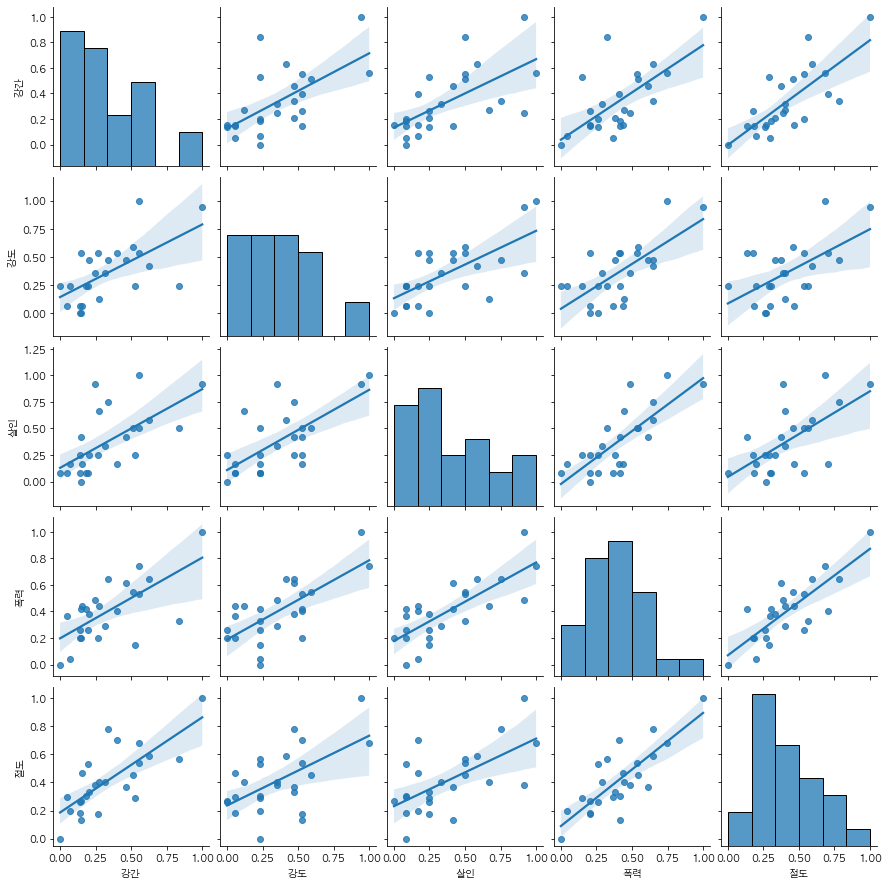

In [75]:
# 강간, 강도, 절도, 살인, 폭력 건수에 대한 상관관계 시각화

sns.pairplot(
    crime_anal_norm,
    vars=['강간','강도','살인','폭력','절도'],
    kind='reg',
)

plt.show()

> 5대범죄 모두 양의 상관관계   
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다.

### CCTV와 살인, 강도에 대한 그래프

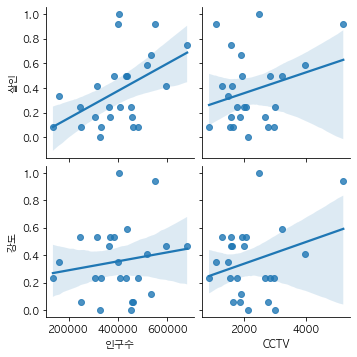

In [76]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['살인','강도'],
    kind='reg'
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다.     
> 특히, 강도 보다는 살인 발생수가 훨씬 많이 증가한다.      
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다.  
> 따라서 CCTV가 없을때 살인 사건 발생수가 증가한다. 

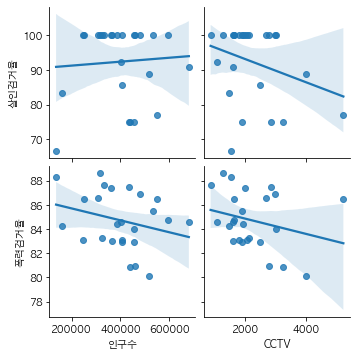

In [77]:
### 인구수, CCTV와 살인검거율, 폭력 검거율을 회귀선으로 확인후 Comment

sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['살인검거율','폭력검거율'],
    kind='reg'
)
plt.show()

> 인구수와 살인검거율 만이 약간의 선형관계를 가지고 있으나 큰 상관관계를 가지지는 않는다.   
> CCTV 가 증가하면 살인 검거율과 폭력 검거율은 감소한다. (약한 상관관계를 가진다.)    
> 인구수가 증가하면 폭력 검거율은 감소한다.   
> CCTV와 인구수는 폭력검거율, 살인검거율과의 상관관계를 가지지 않는다.    
> 

---
# heatmap을 이용한 전체 검거율 확인

In [78]:
# 검거의 최대값 가져오기
tmp_max = crime_anal_norm['검거'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


Text(0.5, 1.0, '범죄 검거 비율(정규화된 검거의 합으로 정렬)')

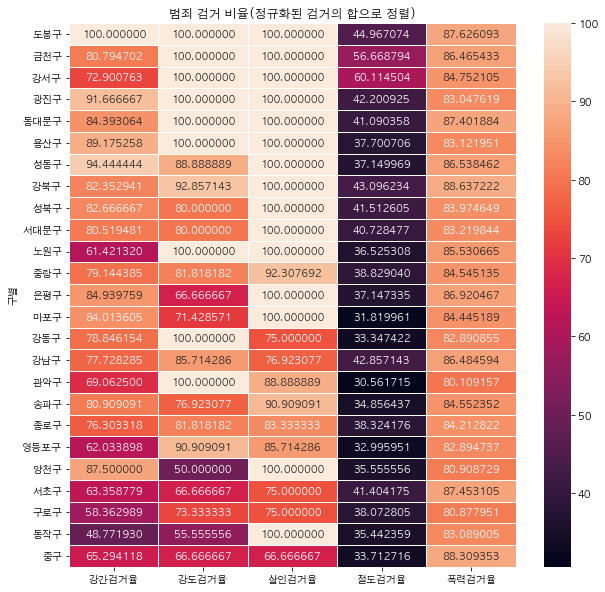

In [79]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(
  crime_anal_norm_sort[target_col],
  annot=True,
  fmt='f',
  linewidths=0.5
)

plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')

> 절도 검거율이 다른 검거율에 비해 매우 저조하다.     
> 검거율이 우수한 지역은 도봉구, 광진구, 성동구, 용산구

### heatmap을 이용한 범죄 발생율 확인

In [81]:
# 검거의 최대값 가져오기
tmp_max = crime_anal_norm['범죄'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.048578,3.697074
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.039837,3.545480
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,680883,1586,0.029878,3.681500
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.028603,3.686223
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.026529,3.717073


Text(0.5, 1.0, '범죄 비율(정규화된 발생건수로 정렬)')

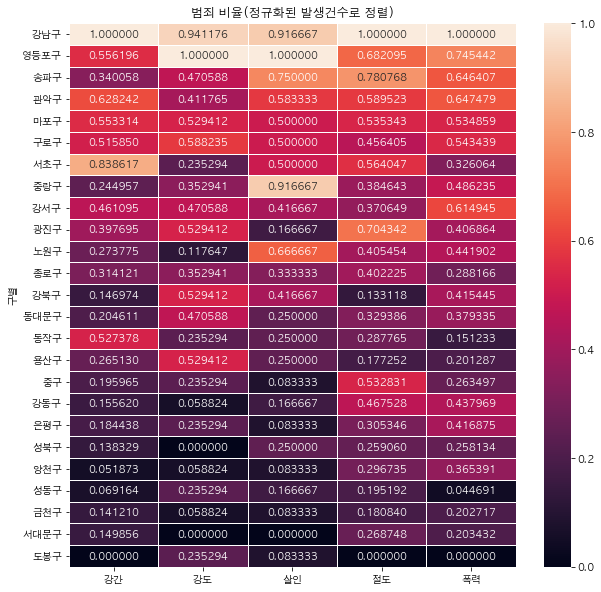

In [82]:
target_col = ['강간','강도','살인','절도','폭력']
plt.figure(figsize=(10,10))
sns.heatmap(
  crime_anal_norm_sort[target_col],
  annot=True,
  fmt='f',
  linewidths=0.5
)

plt.title('범죄 비율(정규화된 발생건수로 정렬)')

In [ ]:
# 검거의 최대값 가져오기
tmp_max = crime_anal_norm['범죄'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort.head()

In [83]:
# 저장하기
crime_anal_norm.to_csv("../Data/seoul_crime_norm.csv")

# 지도 출력

In [84]:
import json
import folium

In [86]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [92]:
# 살인 건수를 서울시 지도에 출력

map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles='Stamen Toner',

)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm['살인'],
    columns=[crime_anal_norm.index, '살인'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)




map

In [94]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 100000 # 10만명당 범죄발생 비율

data = crime_anal_norm['범죄']/ crime_anal_norm['인구수'] * 100000
map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles='Stamen Toner',

)
folium.Choropleth(
    geo_data=geo_str,
    data=data,
    columns=[crime_anal_norm.index, '살인'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)




map